# Lab05_Problem 2 + 3

# Problem 2

# A)

In [4]:
jobpro = read.table('CH09PR10_JobProficiency.txt', header=F)
head(jobpro)

V1,V2,V3,V4,V5
88,86,110,100,87
80,62,97,99,100
96,110,107,103,103
76,101,117,93,95
80,100,101,95,88
73,78,85,95,84


In [5]:
colnames(jobpro) = c("Y", "X1", "X2", "X3", "X4") 
head(jobpro)

Y,X1,X2,X3,X4
88,86,110,100,87
80,62,97,99,100
96,110,107,103,103
76,101,117,93,95
80,100,101,95,88
73,78,85,95,84


In [7]:
attach(jobpro)

The following objects are masked from jobpro (pos = 3):

    X1, X2, X3, X4, Y

The following objects are masked from job:

    X1, X2, X3, X4, Y



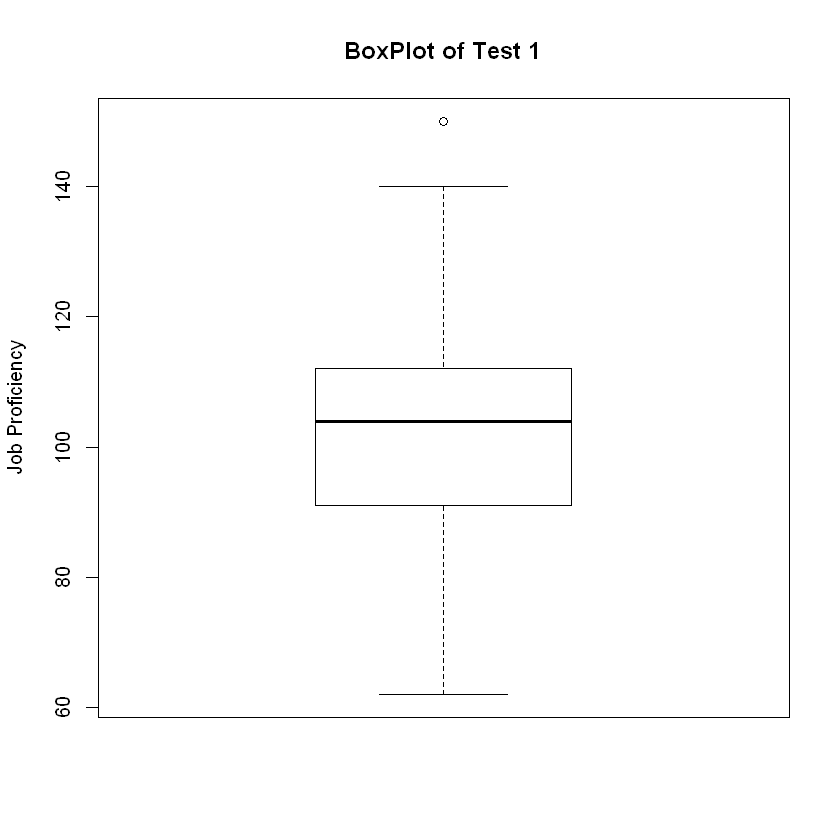

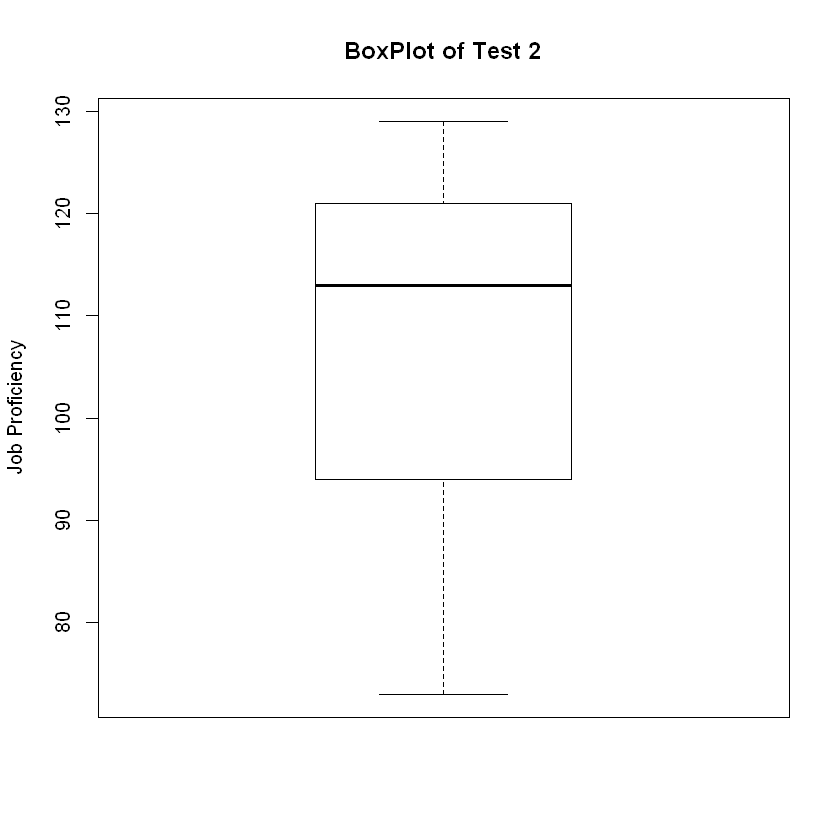

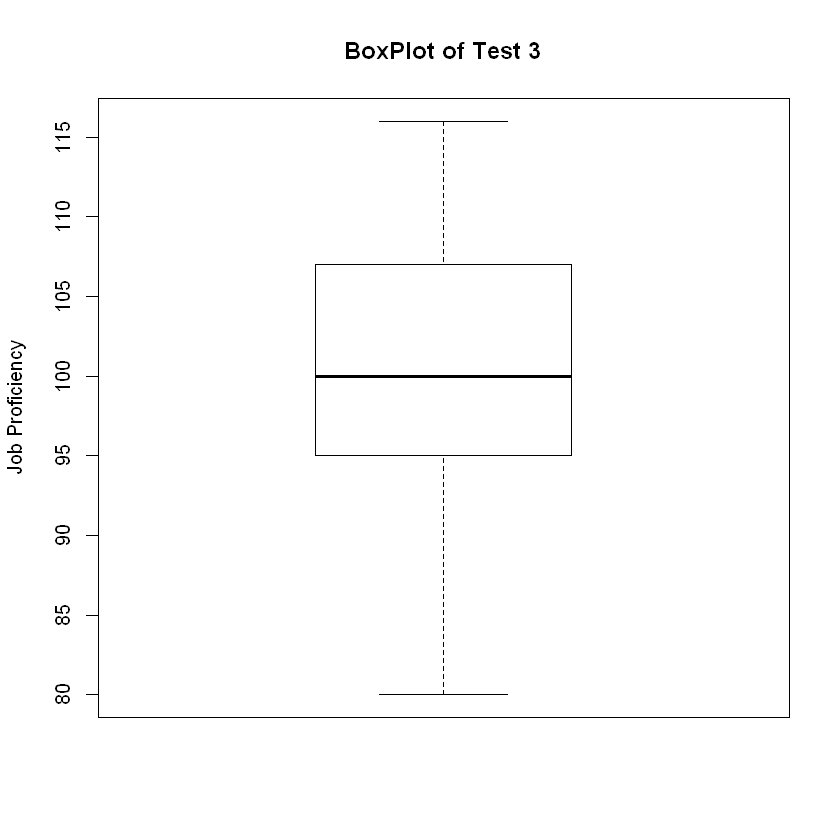

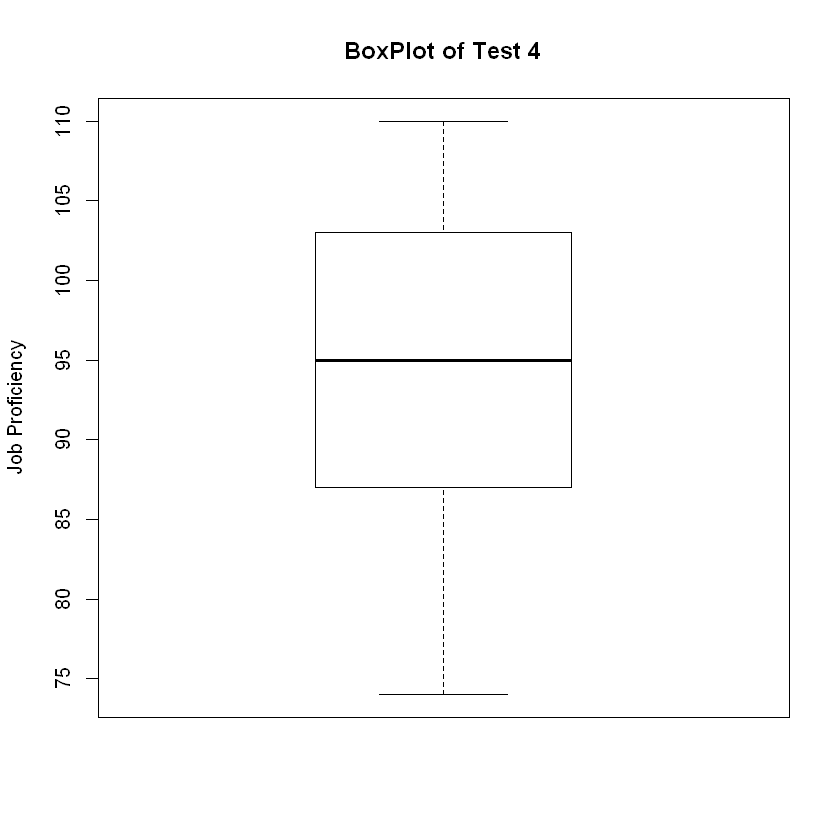

In [9]:
boxplot(jobpro$X1, main="BoxPlot of Test 1", ylab="Job Proficiency")
boxplot(jobpro$X2, main="BoxPlot of Test 2", ylab="Job Proficiency")
boxplot(jobpro$X3, main="BoxPlot of Test 3", ylab="Job Proficiency")
boxplot(jobpro$X4, main="BoxPlot of Test 4", ylab="Job Proficiency")

Test 1 have a outlier <br/>
Test 2 seems to be asymmetric

# B)

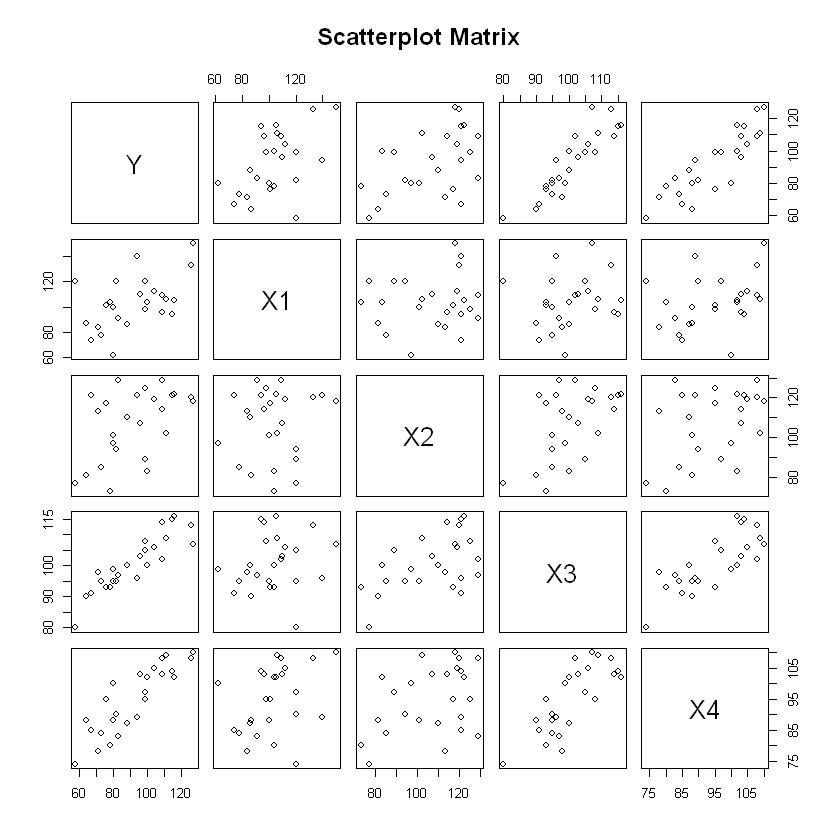

In [10]:
pairs(~Y+X1+X2+X3+X4,jobpro, main="Scatterplot Matrix")

In [21]:
cor(jobpro)

,Y,X1,X2,X3,X4
Y,1.0000000,0.5144107,0.4970057,0.8970645,0.8693865
X1,0.5144107,1.0000000,0.1022689,0.1807692,0.3266632
X2,0.4970057,0.1022689,1.0000000,0.5190448,0.3967101
X3,0.8970645,0.1807692,0.5190448,1.0000000,0.7820385
X4,0.8693865,0.3266632,0.3967101,0.7820385,1.0000000


Serious multicollinearity problem: X3 and X4 <br/>
Strong linear relationship: X3, X4 and Y <br/>
Moderately strong relationship: X1 and Y (X1-Y: 1.0000000,Y-X1: 1.0000000)

# C)

In [22]:
fullmodel = lm(Y ~ X1 + X2 + X3 + X4, jobpro)
summary(fullmodel)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9779 -3.4506  0.0941  2.4749  5.9959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.38182    9.94106 -12.512 6.48e-11 ***
X1             0.29573    0.04397   6.725 1.52e-06 ***
X2             0.04829    0.05662   0.853  0.40383    
X3             1.30601    0.16409   7.959 1.26e-07 ***
X4             0.51982    0.13194   3.940  0.00081 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.099 on 20 degrees of freedom
Multiple R-squared:  0.9629,	Adjusted R-squared:  0.9555 
F-statistic: 129.7 on 4 and 20 DF,  p-value: 5.262e-14


In [23]:
anova(fullmodel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,2395.8547,2395.85466,142.61994,1.480226e-10
X2,1,1806.9654,1806.96541,107.56466,1.707742e-09
X3,1,4254.4592,4254.45924,253.25856,8.044871e-13
X4,1,260.7432,260.74317,15.52146,8.099714e-04
Residuals,20,335.9775,16.79888,NA,NA


In [24]:
sse = sum(residuals(fullmodel)^2)
sse

[1] 335.9775

In [25]:
ssto = sum((jobpro$Y - mean(jobpro$Y))^2)
ssto

[1] 9054

In [29]:
n = nrow(jobpro)
p = 4
aR2_full = 1 - (sse / (n-p))/(ssto/(n-1))
aR2_full

[1] 0.9575906

In [30]:
model_134 = lm(Y ~ X1 + X3 + X4, jobpro)
summary(model_134) 
anova(model_134) 
sse_134 = sum(residuals(model_134)^2)
sse_134
ssto_134 = sum((jobpro$Y - mean(jobpro$Y))^2)
ssto_134 
n = nrow(jobpro)
p = 4
aR2_134 = 1 - (sse_134 / (n-p))/(ssto_134/(n-1))
aR2_134


Call:
lm(formula = Y ~ X1 + X3 + X4, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4579 -3.1563 -0.2057  1.8070  6.6083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.20002    9.87406 -12.578 3.04e-11 ***
X1             0.29633    0.04368   6.784 1.04e-06 ***
X3             1.35697    0.15183   8.937 1.33e-08 ***
X4             0.51742    0.13105   3.948 0.000735 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.072 on 21 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.956 
F-statistic:   175 on 3 and 21 DF,  p-value: 5.16e-15


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,2395.8547,2395.85466,144.49564,7.054495e-11
X3,1,6051.4879,6051.48790,364.96938,9.358961e-15
X4,1,258.4604,258.46044,15.58793,7.353614e-04
Residuals,21,348.1970,16.58081,NA,NA


[1] 348.197

[1] 9054

[1] 0.9560482

In [32]:
model_123 = lm(Y ~ X1 + X2 + X3, jobpro)
summary(model_123) 
anova(model_123) 
sse_123 = sum(residuals(model_123)^2)
sse_123
ssto_123 = sum((jobpro$Y - mean(jobpro$Y))^2)
ssto_123 
n = nrow(jobpro)
p = 4
aR2_123 = 1 - (sse_123 / (n-p))/(ssto_123/(n-1))
aR2_123


Call:
lm(formula = Y ~ X1 + X2 + X3, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7517 -3.0371 -0.4618  1.8358 11.7315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -127.77378   12.88053  -9.920 2.23e-09 ***
X1             0.34813    0.05451   6.387 2.48e-06 ***
X2             0.04353    0.07362   0.591    0.561    
X3             1.77921    0.14541  12.236 5.08e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.331 on 21 degrees of freedom
Multiple R-squared:  0.9341,	Adjusted R-squared:  0.9247 
F-statistic: 99.21 on 3 and 21 DF,  p-value: 1.457e-12


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,2395.8547,2395.85466,84.31574,8.442768e-09
X2,1,1806.9654,1806.96541,63.59135,8.668858e-08
X3,1,4254.4592,4254.45924,149.72439,5.078669e-11
Residuals,21,596.7207,28.41527,NA,NA


[1] 596.7207

[1] 9054

[1] 0.9246779

In [33]:
model_13 = lm(Y ~ X1 + X3, jobpro)
summary(model_13) 
anova(model_13) 
sse_13 = sum(residuals(model_13)^2)
sse_13
ssto_13 = sum((jobpro$Y - mean(jobpro$Y))^2)
ssto_13 
n = nrow(jobpro)
p = 4
aR2_13 = 1 - (sse_13 / (n-p))/(ssto_13/(n-1))
aR2_13


Call:
lm(formula = Y ~ X1 + X3, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3489 -2.8086 -0.4546  2.8981 12.6469 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -127.59569   12.68526  -10.06 1.09e-09 ***
X1             0.34846    0.05369    6.49 1.58e-06 ***
X3             1.82321    0.12307   14.81 6.31e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.251 on 22 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9269 
F-statistic: 153.2 on 2 and 22 DF,  p-value: 1.222e-13


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,2395.8547,2395.85466,86.88396,4.269500e-09
X3,1,6051.4879,6051.48790,219.45290,6.313011e-13
Residuals,22,606.6574,27.57534,NA,NA


[1] 606.6574

[1] 9054

[1] 0.9234236

In [37]:
X = cbind(jobpro$X1, jobpro$X2, jobpro$X3, jobpro$X4)
library(leaps)
jobleaps = leaps(X, jobpro$Y, method='r2')
jobleaps

,1,2,3,4
1,FALSE,FALSE,TRUE,FALSE
1,FALSE,FALSE,FALSE,TRUE
1,TRUE,FALSE,FALSE,FALSE
1,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE
2,FALSE,FALSE,TRUE,TRUE
2,TRUE,FALSE,FALSE,TRUE
2,FALSE,TRUE,TRUE,FALSE
2,FALSE,TRUE,FALSE,TRUE
2,TRUE,TRUE,FALSE,FALSE


In [38]:
jobleaps_aR = leaps(X, jobpro$Y, method='adjr2')
jobleaps_aR

,1,2,3,4
1,FALSE,FALSE,TRUE,FALSE
1,FALSE,FALSE,FALSE,TRUE
1,TRUE,FALSE,FALSE,FALSE
1,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE
2,FALSE,FALSE,TRUE,TRUE
2,TRUE,FALSE,FALSE,TRUE
2,FALSE,TRUE,TRUE,FALSE
2,FALSE,TRUE,FALSE,TRUE
2,TRUE,TRUE,FALSE,FALSE


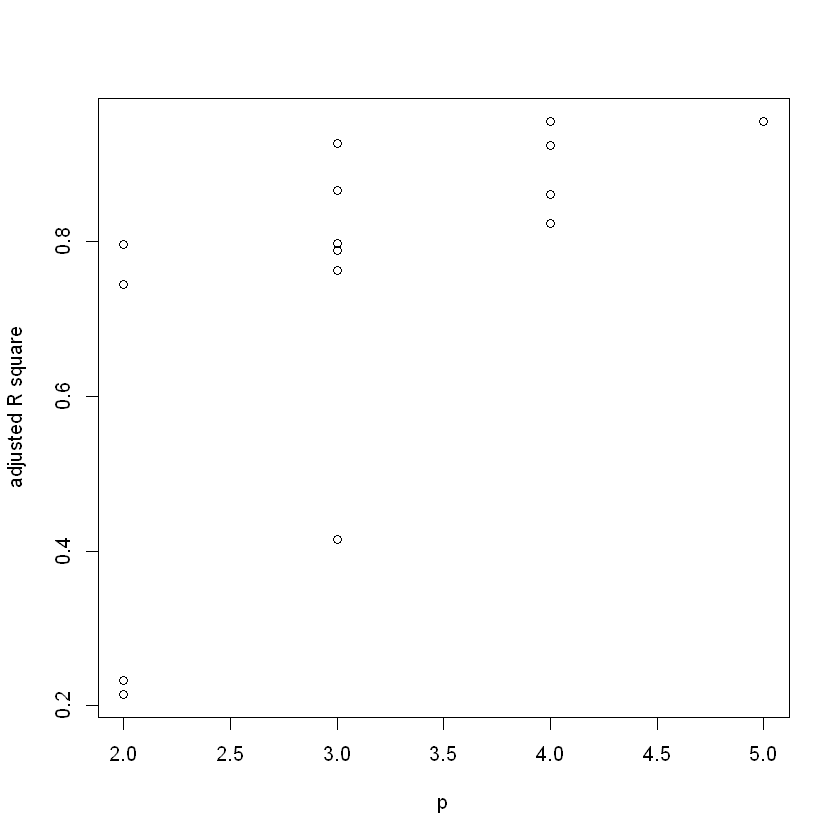

In [39]:
plot(jobleaps_aR$size, jobleaps_aR$adjr2, xlab='p', ylab='adjusted R square')

# D)

# Cp

In [40]:
jobleaps_Cp = leaps(X, jobpro$Y, method='Cp')
jobleaps_Cp

,1,2,3,4
1,FALSE,FALSE,TRUE,FALSE
1,FALSE,FALSE,FALSE,TRUE
1,TRUE,FALSE,FALSE,FALSE
1,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE
2,FALSE,FALSE,TRUE,TRUE
2,TRUE,FALSE,FALSE,TRUE
2,FALSE,TRUE,TRUE,FALSE
2,FALSE,TRUE,FALSE,TRUE
2,TRUE,TRUE,FALSE,FALSE


In [41]:
bestmodel.Cp = jobleaps_Cp$which[which(jobleaps_Cp$Cp == min(jobleaps_Cp$Cp)),]
bestmodel.Cp

1     2     3     4 
 TRUE FALSE  TRUE  TRUE

# AIC

In [54]:
n = nrow(jobpro)
p = (2:5)
AIC_full = n*log(sum((resid(fullmodel))^2)) - n*log(n) + 2*p
AIC_full

[1] 68.95421 70.95421 72.95421 74.95421

# BIC

In [55]:
BIC_full = n*log(sum((resid(fullmodel))^2)) - n*log(n) + log(n)*p
BIC_full

[1] 71.39196 74.61084 77.82971 81.04859

In [56]:
selinfo = regsubsets(Y ~ X1+X2+X3+X4, data=jobpro, nbest = 6)
info = summary(selinfo)
print(info)

Subset selection object
Call: regsubsets.formula(Y ~ X1 + X2 + X3 + X4, data = jobpro, nbest = 6)
4 Variables  (and intercept)
   Forced in Forced out
X1     FALSE      FALSE
X2     FALSE      FALSE
X3     FALSE      FALSE
X4     FALSE      FALSE
6 subsets of each size up to 4
Selection Algorithm: exhaustive
         X1  X2  X3  X4 
1  ( 1 ) " " " " "*" " "
1  ( 2 ) " " " " " " "*"
1  ( 3 ) "*" " " " " " "
1  ( 4 ) " " "*" " " " "
2  ( 1 ) "*" " " "*" " "
2  ( 2 ) " " " " "*" "*"
2  ( 3 ) "*" " " " " "*"
2  ( 4 ) " " "*" "*" " "
2  ( 5 ) " " "*" " " "*"
2  ( 6 ) "*" "*" " " " "
3  ( 1 ) "*" " " "*" "*"
3  ( 2 ) "*" "*" "*" " "
3  ( 3 ) " " "*" "*" "*"
3  ( 4 ) "*" "*" " " "*"
4  ( 1 ) "*" "*" "*" "*"


In [53]:
summary(selinfo)$adjr2

[1] 0.7962344 0.7452170 0.2326452 0.2142762 0.9269043 0.8660988 0.7984716
 [8] 0.7884436 0.9560482 0.9246779 0.8616797 0.8232664 0.9554702

# E)

In [57]:
forward = step(lm(Y ~ 1, jobpro), list(upper = ~ X1+X2+X3+X4), direction='forward')
summary(forward)

Start:  AIC=149.3
Y ~ 1

       Df Sum of Sq    RSS    AIC
+ X3    1    7286.0 1768.0 110.47
+ X4    1    6843.3 2210.7 116.06
+ X1    1    2395.9 6658.1 143.62
+ X2    1    2236.5 6817.5 144.21
<none>              9054.0 149.30

Step:  AIC=110.47
Y ~ X3

       Df Sum of Sq     RSS     AIC
+ X1    1   1161.37  606.66  85.727
+ X4    1    656.71 1111.31 100.861
<none>              1768.02 110.469
+ X2    1     12.21 1755.81 112.295

Step:  AIC=85.73
Y ~ X3 + X1

       Df Sum of Sq    RSS    AIC
+ X4    1   258.460 348.20 73.847
<none>              606.66 85.727
+ X2    1     9.937 596.72 87.314

Step:  AIC=73.85
Y ~ X3 + X1 + X4

       Df Sum of Sq    RSS    AIC
<none>              348.20 73.847
+ X2    1     12.22 335.98 74.954



Call:
lm(formula = Y ~ X3 + X1 + X4, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4579 -3.1563 -0.2057  1.8070  6.6083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.20002    9.87406 -12.578 3.04e-11 ***
X3             1.35697    0.15183   8.937 1.33e-08 ***
X1             0.29633    0.04368   6.784 1.04e-06 ***
X4             0.51742    0.13105   3.948 0.000735 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.072 on 21 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.956 
F-statistic:   175 on 3 and 21 DF,  p-value: 5.16e-15


# F)

The model evaluated using the forward stepwise regression shows the same result as I earlier chose under the criteria of adjusted R square (top on the list).

# Problem 3

In [60]:
jobvali = read.table('CH09PR22Jobvalidation.txt', header=F)
head(jobvali)

V1,V2,V3,V4,V5
58,65,109,88,84
92,85,90,104,98
71,93,73,91,82
77,95,57,95,85
92,102,139,101,92
66,63,101,93,84


In [61]:
colnames(jobvali) = c("Y", "X1", "X2", "X3", "X4") 
head(jobvali)

Y,X1,X2,X3,X4
58,65,109,88,84
92,85,90,104,98
71,93,73,91,82
77,95,57,95,85
92,102,139,101,92
66,63,101,93,84


# A)

In [64]:
cor(jobvali)

,Y,X1,X2,X3,X4
Y,1.0000000,0.53707787,0.34477442,0.8880519,0.8879388
X1,0.5370779,1.00000000,0.01057088,0.1772891,0.3196395
X2,0.3447744,0.01057088,1.00000000,0.3437441,0.2207638
X3,0.8880519,0.17728907,0.34374413,1.0000000,0.8714466
X4,0.8879388,0.31963945,0.22076377,0.8714466,1.0000000


In [65]:
cor(jobpro)

,Y,X1,X2,X3,X4
Y,1.0000000,0.5144107,0.4970057,0.8970645,0.8693865
X1,0.5144107,1.0000000,0.1022689,0.1807692,0.3266632
X2,0.4970057,0.1022689,1.0000000,0.5190448,0.3967101
X3,0.8970645,0.1807692,0.5190448,1.0000000,0.7820385
X4,0.8693865,0.3266632,0.3967101,0.7820385,1.0000000


The two correlation matrices are reasonably similar

# B)

In [71]:
bestsubset_jobvali = lm(Y ~ X1 + X3 + X4, data = jobvali)
summary(bestsubset_jobvali)


Call:
lm(formula = Y ~ X1 + X3 + X4, data = jobvali)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4619 -2.3836  0.6834  2.1123  7.2394 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -122.76705   11.84783 -10.362 1.04e-09 ***
X1             0.31238    0.04729   6.605 1.54e-06 ***
X3             1.40676    0.23262   6.048 5.31e-06 ***
X4             0.42838    0.19749   2.169   0.0417 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.284 on 21 degrees of freedom
Multiple R-squared:  0.9489,	Adjusted R-squared:  0.9416 
F-statistic:   130 on 3 and 21 DF,  p-value: 1.017e-13


In [72]:
jobvali_fitted = fitted(bestsubset_jobvali)
jobvali_fitted

1         2         3         4         5         6         7         8 
 57.31655  92.06969  69.42683  76.96377  90.58967  63.72557  58.88766  59.51190 
        9        10        11        12        13        14        15        16 
 72.00890  76.69261  93.20626 102.48876  69.38356 106.47552  97.38228  95.15793 
       17        18        19        20        21        22        23        24 
 73.02385 111.12926  84.76064  92.97276 102.99396 107.07085  96.91419  90.46190 
       25 
113.38510

In [73]:
mean(summary(bestsubset_jobvali)$residuals^2)

[1] 15.41814

The  estimates  for  the  validation  data  set  appear  to  be reasonably similar to those obtained for the model-building data set

# C)

In [63]:
bestmodel = lm(Y~X1+X3+X4,jobpro)
summary(bestmodel)


Call:
lm(formula = Y ~ X1 + X3 + X4, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4579 -3.1563 -0.2057  1.8070  6.6083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.20002    9.87406 -12.578 3.04e-11 ***
X1             0.29633    0.04368   6.784 1.04e-06 ***
X3             1.35697    0.15183   8.937 1.33e-08 ***
X4             0.51742    0.13105   3.948 0.000735 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.072 on 21 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.956 
F-statistic:   175 on 3 and 21 DF,  p-value: 5.16e-15


BEST MODEL: Y_hat = -124.20002 + 0.29633 + 1.35697 + 0.51742

In [74]:
fullmodel_jobvali = lm(Y~X1 + X2 + X3 + X4,jobpro)
summary(fullmodel_jobvali)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9779 -3.4506  0.0941  2.4749  5.9959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.38182    9.94106 -12.512 6.48e-11 ***
X1             0.29573    0.04397   6.725 1.52e-06 ***
X2             0.04829    0.05662   0.853  0.40383    
X3             1.30601    0.16409   7.959 1.26e-07 ***
X4             0.51982    0.13194   3.940  0.00081 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.099 on 20 degrees of freedom
Multiple R-squared:  0.9629,	Adjusted R-squared:  0.9555 
F-statistic: 129.7 on 4 and 20 DF,  p-value: 5.262e-14


In [75]:
anova(fullmodel_jobvali)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,2395.8547,2395.85466,142.61994,1.480226e-10
X2,1,1806.9654,1806.96541,107.56466,1.707742e-09
X3,1,4254.4592,4254.45924,253.25856,8.044871e-13
X4,1,260.7432,260.74317,15.52146,8.099714e-04
Residuals,20,335.9775,16.79888,NA,NA


In [78]:
model_134 = lm(Y ~ X1 + X3 + X4, jobpro)
summary(model_134) 
anova(model_134) 


Call:
lm(formula = Y ~ X1 + X3 + X4, data = jobpro)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4579 -3.1563 -0.2057  1.8070  6.6083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.20002    9.87406 -12.578 3.04e-11 ***
X1             0.29633    0.04368   6.784 1.04e-06 ***
X3             1.35697    0.15183   8.937 1.33e-08 ***
X4             0.51742    0.13105   3.948 0.000735 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.072 on 21 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.956 
F-statistic:   175 on 3 and 21 DF,  p-value: 5.16e-15


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,2395.8547,2395.85466,144.49564,7.054495e-11
X3,1,6051.4879,6051.48790,364.96938,9.358961e-15
X4,1,258.4604,258.46044,15.58793,7.353614e-04
Residuals,21,348.1970,16.58081,NA,NA


The mean square error for the validation data set and the mean square error of the best model in model-building data set are reasonably similar.